In [23]:
#import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [7]:
raw_data= pd.read_csv('1.04. Real-life example.csv') #read data

In [9]:
raw_data.head #display data summary 

<bound method NDFrame.head of               Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991             

In [11]:
raw_data.describe(include= 'all') #display data summary

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [13]:
raw_data= raw_data.drop('Model', axis=1) #dropping unwanted features, like model which as 321 unique items

In [21]:
raw_data.isnull().sum()*100/len(raw_data) # finding out % of null/blank values

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [31]:
data=raw_data.dropna() # removing the null/blank items

In [33]:
data.info() # finding outlier in the data

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


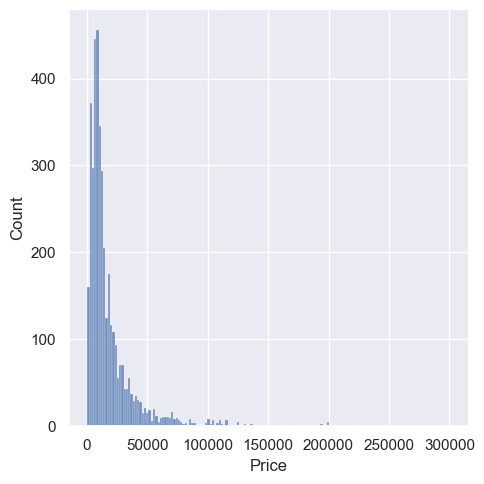

In [35]:
sns.displot(data['Price'])

In [41]:
data['Price'].describe()

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

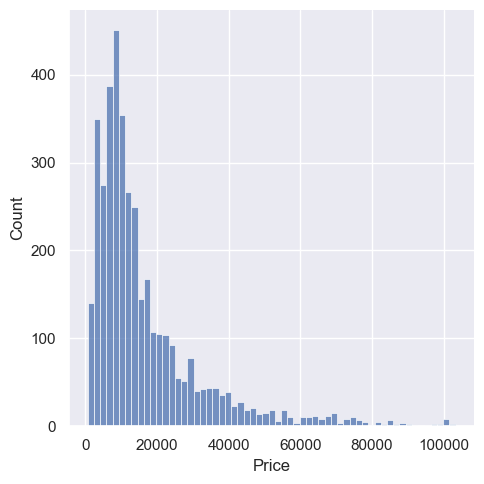

In [43]:
q=data['Price'].quantile(0.98) # removing the outlier, top 2% of values
data= data[data['Price']<q]
sns.displot(data['Price'])

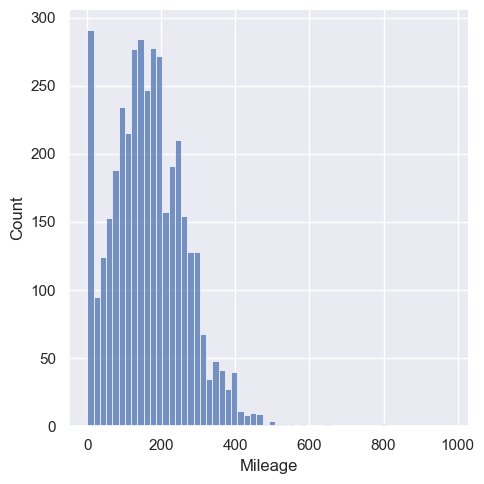

In [45]:
sns.displot(data['Mileage'])

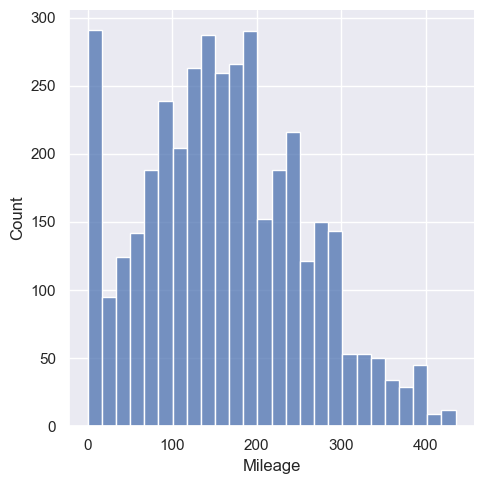

In [47]:
q=data['Mileage'].quantile(0.99) # removing the outlier, top 1% of values
data= data[data['Mileage']<q]
sns.displot(data['Mileage'])

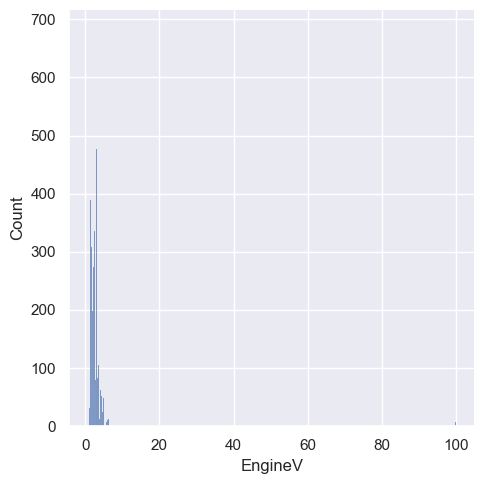

In [49]:
sns.displot(data['EngineV'])

In [53]:
data['EngineV'].describe()

count    3903.000000
mean        2.742242
std         5.005715
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

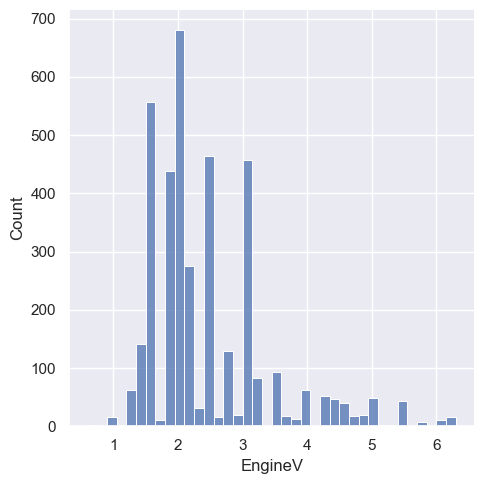

In [57]:
data= data[data['EngineV']<6.5] # keeping engine above 6.5 L which is the typical value, removing wrong values
sns.displot(data['EngineV'])

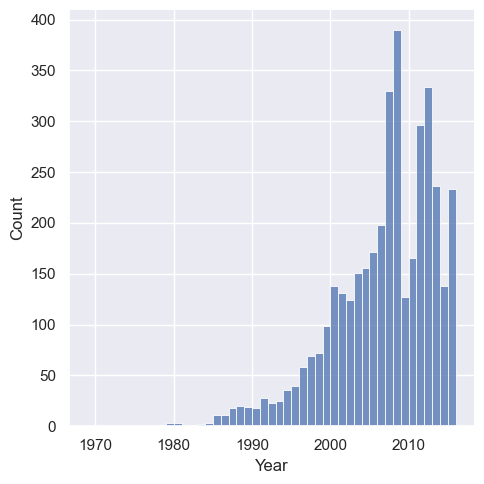

In [59]:
sns.displot(data['Year'])

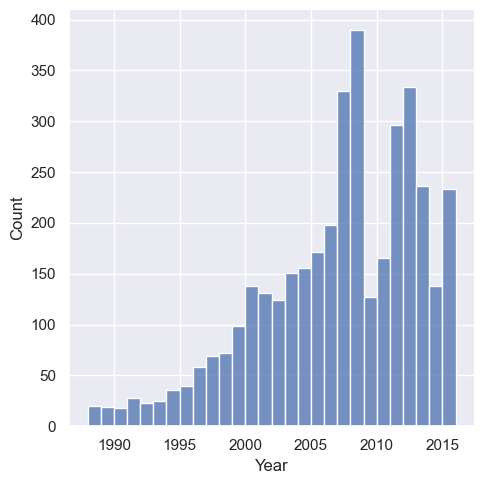

In [61]:
q = data['Year'].quantile(0.01) #removing the bottom 1% data, old models
data = data[data['Year']>q]
sns.displot(data['Year'])

In [63]:
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [71]:
data_cleaned =  data.reset_index(drop=True) #resetting the index value

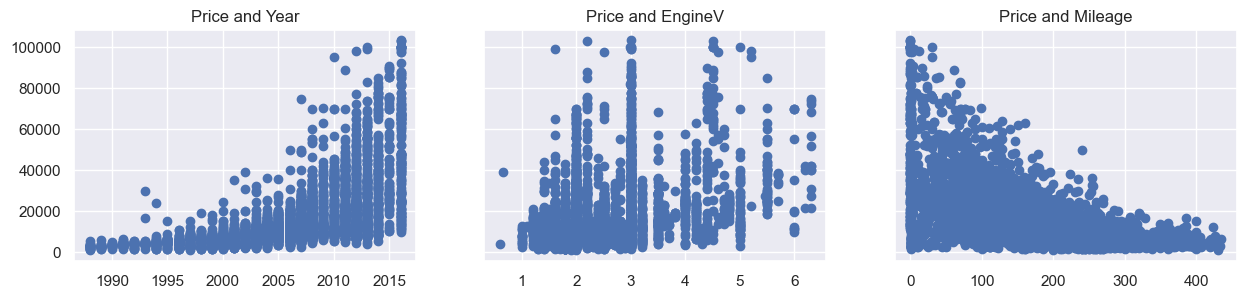

In [73]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show() # scatter plot to examine the data relationship

In [75]:
data_cleaned['log_Price']= np.log(data_cleaned['Price']) # log to linearize the exponential relationship

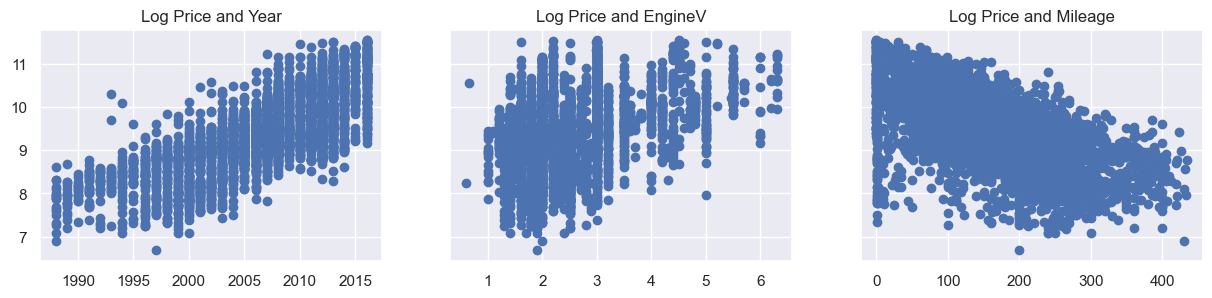

In [79]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [99]:
data_cleaned.head(10)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,other,212,1.80,Gas,no,1999,7.244228
8,Renault,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,sedan,260,1.79,Petrol,yes,1994,7.824046


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif # checking for multicolinearity by calculating the variance inflation factor, if IVF>10, then remedial actions are required

,VIF,Features
0,3.899033,Mileage
1,10.307533,Year
2,7.637076,EngineV


In [103]:
data = data_cleaned.drop(['Year'],axis=1) # dropping the year feature as IVF is >10

In [105]:
data = pd.get_dummies(data, drop_first=True) # converting categorical variables into numerical for analysis

In [107]:
data.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [111]:
cols = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data= data[cols] # Rearranging the columns to get predictors and Target together

In [115]:
targets = data['log_Price']

inputs = data.drop(['log_Price'],axis=1)  #Setting the inputs and the target from the cleaned data

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Created a scaler object

scaler.fit(inputs) # Fit the inputs (calculate the mean and standard deviation feature-wise)

inputs_scaled = scaler.transform(inputs) # Scale the features and store them in a new variable (the actual scaling procedure)

In [119]:
from sklearn.model_selection import train_test_split # Import the module for the split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365) # Spliting the variables with an 80-20 split and some random state

In [121]:
reg = LinearRegression()  # Create a linear regression object

reg.fit(x_train,y_train)    # Fit the regression with the scaled TRAIN inputs and targets

LinearRegression()

In [123]:
y_hat = reg.predict(x_train)  # Checking the outputs of the regression

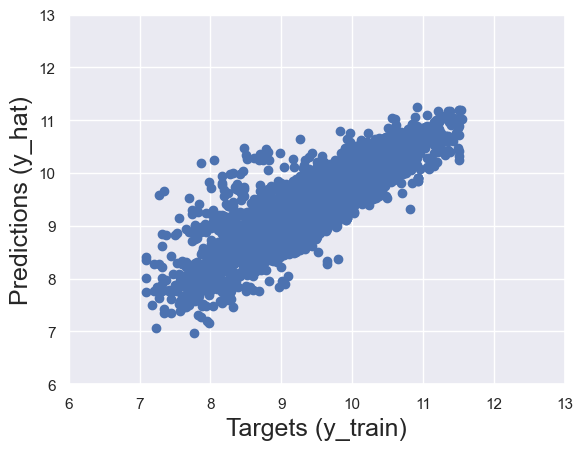

In [125]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()    # Comparing the targets (y_train) and the predictions (y_hat)

Text(0.5, 1.0, 'Residuals PDF')

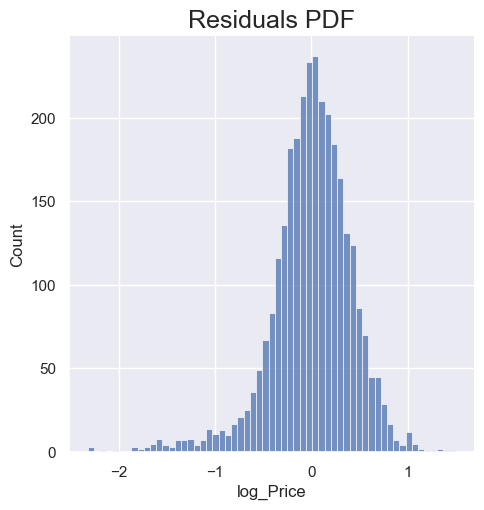

In [127]:
sns.displot(y_train - y_hat)

plt.title("Residuals PDF", size=18) # plotting the distribution of residuals, how far off we are from the actual values

In [129]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents) # getting and printing the regression model parameters

Score:  0.7494553293190432
Intercept:  9.387782816691688
Coefficents:  [-0.43588103  0.20992556  0.00349    -0.00918508 -0.14030828 -0.1805565
 -0.06326013 -0.09911693 -0.14571937 -0.09759722 -0.19919649 -0.1326728
 -0.16230903 -0.11548866 -0.02457821 -0.14279025  0.31416213]


In [131]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary # creating a short summary with weights

,Features,Weights
0,Mileage,-0.435881
1,EngineV,0.209926
2,Brand_BMW,0.003490
3,Brand_Mercedes-Benz,-0.009185
4,Brand_Mitsubishi,-0.140308
5,Brand_Renault,-0.180556
6,Brand_Toyota,-0.063260
7,Brand_Volkswagen,-0.099117
8,Body_hatch,-0.145719
9,Body_other,-0.097597


In [133]:
y_hat_test = reg.predict(x_test) # predict the test values from the trained model

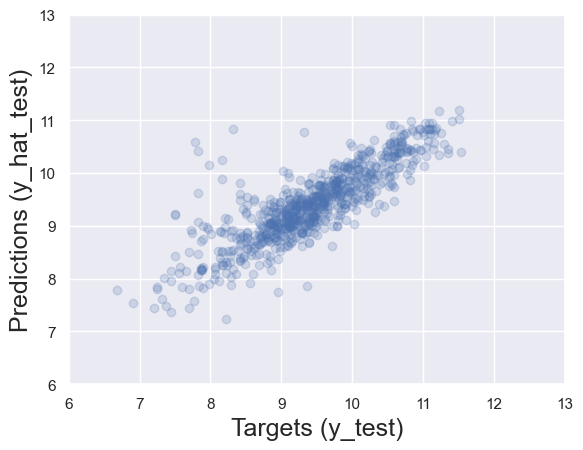

In [135]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() #scatter plot with test data

In [139]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction']) # taking exponential of Price to convert

In [141]:
df_pf['Target'] = np.exp(y_test)
df_pf # taking expo of Target y_test and adding it to the data frame and display

,Prediction,Target
0,16851.982021,NaN
1,3083.358207,7900.0
2,13699.093320,NaN
3,13010.578900,NaN
4,19365.981091,NaN
...,...,...
761,8509.446944,NaN
762,29052.144626,2700.0
763,11875.503539,NaN
764,6517.014266,NaN


In [143]:
y_test = y_test.reset_index(drop=True)

In [145]:
df_pf['Target'] = np.exp(y_test)

In [147]:
df_pf

,Prediction,Target
0,16851.982021,24700.0
1,3083.358207,4000.0
2,13699.093320,18300.0
3,13010.578900,15600.0
4,19365.981091,14200.0
...,...,...
761,8509.446944,6900.0
762,29052.144626,26500.0
763,11875.503539,14899.0
764,6517.014266,5000.0


In [149]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [151]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,16851.982021,24700.0,7848.017979,31.773352
1,3083.358207,4000.0,916.641793,22.916045
2,13699.093320,18300.0,4600.906680,25.141567
3,13010.578900,15600.0,2589.421100,16.598853
4,19365.981091,14200.0,-5165.981091,36.380149
...,...,...,...,...
761,8509.446944,6900.0,-1609.446944,23.325318
762,29052.144626,26500.0,-2552.144626,9.630734
763,11875.503539,14899.0,3023.496461,20.293285
764,6517.014266,5000.0,-1517.014266,30.340285


In [153]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,766.000000,766.000000,766.000000,766.000000
mean,15647.946469,17806.382337,2158.435868,40.300582
std,11777.347449,16381.051873,8892.745562,100.364196
min,1384.119982,800.000000,-46435.411864,0.004309
25%,7935.645334,7500.000000,-1540.623607,10.590275
50%,11920.597364,12050.000000,383.638861,22.786415
75%,19361.075726,21875.000000,4078.976186,39.612236
max,72308.135646,102800.000000,69934.504005,1567.519481


In [155]:
pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
594,23997.97,23999.00,1.03,0.00
665,23997.97,23999.00,1.03,0.00
130,8909.76,8910.53,0.77,0.01
443,7494.92,7500.00,5.08,0.07
600,51151.02,51000.00,-151.02,0.30
210,12943.23,12900.00,-43.23,0.34
233,15053.65,15000.00,-53.65,0.36
139,5578.51,5600.00,21.49,0.38
7,8545.00,8500.00,-45.00,0.53
506,43762.09,44000.00,237.91,0.54
